# 안녕하세요^^ 
# AIVLE 미니 프로젝트에 오신 여러분을 환영합니다.
* 본 과정에서는 실제 사례와 데이터를 기반으로 문제를 해결하는 전체 과정을 자기 주도형 실습으로 진행해볼 예정입니다.
* 앞선 교육과정을 정리하는 마음과 지금까지 배운 내용을 바탕으로 문제 해결을 해볼게요!
* 미니 프로젝트를 통한 문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

---

## 0. 환경 설정하기

### 1) 구글 드라이브 연결하기

In [32]:
# 코랩 사용 시 구글 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 2) 경로 확인하기
<font color="red">※ 주의. 경로는 절대 변경하지 마세요.</font>

In [49]:
# ROOT_PATH 확인 
import os

if os.getcwd() == '/content' :
  # 구글 드라이브 사용 시 
  ROOT_PATH = "/content/drive/MyDrive/AIVLE3rd_individual"
else :
  ROOT_PATH = os.path.abspath('..')

# 영상을 분할한 이미지 경로
IMAGE_PATH = ROOT_PATH + "/image"
# Train 데이터 셋 경로
TRAIN_PATH = ROOT_PATH + "/train"


### 3) 라이브러리 불러오기
필요시 추가 라이브러리는 설치해서 사용하세요.

In [50]:
# 필요 라이브러리 불러오기.
import os
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

# 1. 학습 데이터 세트 만들기 

<font color="green">[실습문제]</font> 1. 이미지 데이터를 class 별로 학습을 위한 데이터 세트 만들기
* class명을 출연진으로 하여 class 별로 학습 데이터 세트를 만듭니다.<br>(class명 : 'jung', 'park', 'sam', 'sayuri')
* 학습 데이터 경로 TRIAN_PATH : "../train/"

> [예시] 폴더 구조 <br>
> train ┐ <br>
> &emsp;&emsp; ├ jung <br>
> &emsp;&emsp; ├ park <br>
> &emsp;&emsp; ├ sam <br>
> &emsp;&emsp; ├ sayuri <br>

__※ 방법은 자유롭게 하셔도 됩니다 물리적으로 직접 "copy & paste"를 하셔도 되고 여력이 된다면 코드로 작성하여 자동화를 하셔도 됩니다.__

In [51]:
TRAIN_PATH = ROOT_PATH + "/train"

In [52]:
# 실습해보세요.


# 2. 데이터 전처리
+  CNN 모델 학습을 위한 전처리 단계
> 이미지 파일 읽기 <br>
> JPEG 형태의 데이터를 RGB 픽셀 값으로 디코딩 <br>
> floating point tensor 형태로 변환 (다차원 배열) <br>
> 0-255 사이의 값을 가지는 픽셀 값을 [0,1] 사이 값으로 변환

<br>

+ KeyPoint : 케라스에서는 이미지 파일을 쉽게 학습시킬 수 있도록 ImageDataGenerator 클래스를 제공합니다.

https://www.tensorflow.org/tutorials/images/data_augmentation

https://keras.io/ko/preprocessing/image/

### 1). ImageDataGenerator 선언 
* `rescale`: 이미지의 픽셀 값을 조정 (0-1 범위로 변환)
* `rotation_range`: 이미지 회전
* `width_shift_range`: 가로 방향으로 이동
* `height_shift_range`: 세로 방향으로 이동
* `shear_range`: 이미지 굴절
* `zoom_range`: 이미지 확대
* `horizontal_flip`: 횡 방향으로 이미지 반전
* `fill_mode`: 이미지를 이동이나 굴절시켰을 때 빈 픽셀 값에 대하여 값을 채우는 방식
* `validation_split`: validation set의 구성 비율

In [ ]:
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    validation_split=0.2,
  )

### 2) ImageDataGenerator flow data

ImageDataGenerator를 잘 만들어 주었다면, `flow_from_directory`로 이미지를 어떻게 공급해 줄 것인가를 지정해 주어야합니다.

* train / validation set 전용 generator를 별도로 정의합니다.
* `batch_size`를 정의합니다 (32)
* `target_size`를 정의합니다. (img_height x img_width). 이미지를 알아서 타겟 사이즈 만큼 잘라내어 공급합니다.
* `class_mode`는 3개 이상의 클래스인 경우 'categorical' 이진 분류의 경우 `binary`를 지정합니다.
* `subset`을 지정합니다. (training / validation)


In [36]:
batch_size = 16
img_height = 480
img_width = 854

In [43]:
train_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    batch_size = 16,
    target_size=(480, 854),
    class_mode = 'categorical',
    subset = 'training'
)

Found 692 images belonging to 4 classes.


In [44]:
validation_generator = train_datagen.flow_from_directory(
    TRAIN_PATH, 
    batch_size= 16,
    target_size=(img_height, img_width),
    class_mode = 'categorical',
    subset = 'validation'
)

Found 172 images belonging to 4 classes.


In [ ]:
train_generator = train_datagen.flow_from_directory(TRAIN_PATH, 
                                                          batch_size=batch_size, 
                                                          target_size=(img_height, img_width), 
                                                          class_mode='categorical', 
                                                          subset='training',                                                    
                                                         )

In [ ]:
validation_generator = train_datagen.flow_from_directory(TRAIN_PATH, 
                                                          batch_size=batch_size, 
                                                          target_size=(img_height, img_width), 
                                                          class_mode='categorical',
                                                          subset='validation', 
                                                         )

### 3) 시각화 해보기

오리지널 사진 파일
Found 864 images belonging to 4 classes.
(16, 480, 854, 3) (16, 4)
[0. 0. 0. 1.]


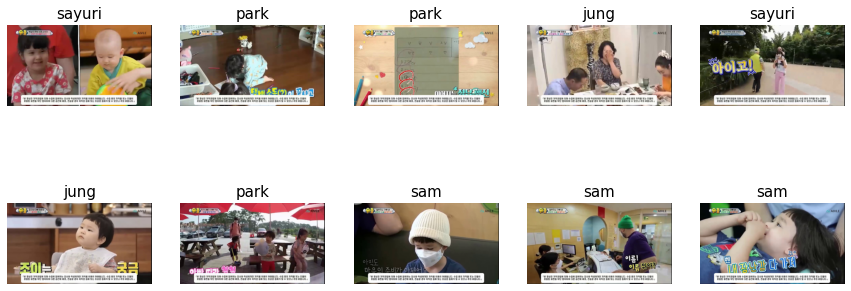

In [48]:
class_map = {
    0: 'jung',
    1: 'park',    
    2: 'sam',
    3: 'sayuri',
    }

print('오리지널 사진 파일')

original_datagen = ImageDataGenerator(rescale=1./255)
original_generator = original_datagen.flow_from_directory(TRAIN_PATH, 
                                                          batch_size=16, 
                                                          target_size=(img_height, img_width), 
                                                          class_mode='categorical'
                                                         )

for x, y in original_generator:
    print(x.shape, y.shape)
    print(y[0])
    
    fig, axes = plt.subplots(2, 5)
    fig.set_size_inches(15, 6)
    for i in range(10):
        axes[i//5, i%5].imshow(x[i])
        axes[i//5, i%5].set_title(class_map[y[i].argmax()], fontsize=15)
        axes[i//5, i%5].axis('off')
    
    plt.show()
    break

In [ ]:
print('Augmentation 적용한 사진 파일')
    
for x, y in train_generator:
    print(x.shape, y.shape)
    print(y[0])
    
    fig, axes = plt.subplots(2, 5)
    fig.set_size_inches(15, 6)
    for i in range(10):
        axes[i//5, i%5].imshow(x[i])
        axes[i//5, i%5].set_title(class_map[y[i].argmax()], fontsize=15)
        axes[i//5, i%5].axis('off')
    
    plt.show()
    break

---

# 2. 데이터 전처리
+ KeyPoint : 케라스에서는 이미지 파일을 쉽게 학습시킬 수 있도록 ImageDataGenerator 클래스를 제공합니다.


### 가. ImageDataGenerator 
+ ImageDataGenerator 클래스를 이용하여 객체를 생성한 뒤 flow_from_directory()함수를 호출하여 Generator를 생성
> + 첫번재 인자 : 이미지 경로를 지정합니다.
> + target_size : 패치 이미지 크기를 지정합니다. 폴더에 있는 원본 이미지 크기가 다르더라도 target_size에 지정된 크기로 자동 조절됩니다.
> + batch_size : 배치 크기를 지정합니다.
> + class_mode : 분류 방식에 대해서 지정합니다.
>> + categorical : 2D one-hot 부호화된 라벨이 반환됩니다.
>> + binary : 1D 이진 라벨이 반환됩니다.
>> + sparse : 1D 정수 라벨이 반환됩니다.
>> + None : 라벨이 반환되지 않습니다. 




[실습문제 2] ImageDataGenerator 생성하기
+ 모델 검증을 위해 데이터를 train:validation(8:2)로 분할합니다.
+ 모델 성능 개선을 위해 데이터 증식(Data augmentation)이 필요 시 자유롭게 설정

In [ ]:
# 실습해보세요.
import tensorflow as tf

from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(
    rescale=1. / 255,  # 이미지 데이터 정규화
    validation_split=0.2, # train, validation 데이터 분할 (8:2)
)

In [ ]:
batch_size = 32
img_height = 96
img_width = 320

In [ ]:
# train_genrator 생성
train_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    batch_size=batch_size,
    shuffle=True,
    #color_mode="grayscale",
    target_size=(img_height, img_width),    
    class_mode='categorical',
    subset='training',
)

In [ ]:
# validation_generator 생성
validation_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
)

In [ ]:
class_map = {
    0: 'jung',
    1: 'park',    
    2: 'sam',
    3: 'sayuri',
    }

In [ ]:
def generatorImage(generator, class_map): 
    
  for x, y in generator:
    #print(generator)
    fig, axes = plt.subplots(4, 5,figsize=(16, 9))
    for i in range(20):
      disp_x = x[i, :, :, 0]
      axes[i//5, i%5].imshow(disp_x, cmap='gray')
      axes[i//5, i%5].set_title(class_map[np.argmax(y[i])], fontsize=15)      
      axes[i//5, i%5].axis('off')
    
    plt.show()
    break

In [ ]:
generatorImage(train_generator, class_map)